In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

!pip install matplotlib numpy

!pip install jupyter notebook

Looking in indexes: https://download.pytorch.org/whl/cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
   

In [3]:
import torch

torch.__version__

'2.5.1+cu121'

In [12]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np


class CelebDataset(Dataset):
  def __init__(self, root_dir, transform=None):
    self.root_dir = root_dir
    self.transform = transform
    self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith(".jpg")]

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    img_path  = self.image_paths[idx]
    image = Image.open(img_path).convert("RGB")

    if self.transform:
      image = self.transform(image)

    return image



In [13]:
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5,0.5,0.5], std= [0.5, 0.5, 0.5])

])

dataset_path = "/content/drive/MyDrive/Colab Notebooks/Untitled Folder/img_align_celeba1"
dataset = CelebDataset(dataset_path, transform=transform)

dataloader = DataLoader(dataset, batch_size=30, shuffle=True)

print(f"Total number of images loaded: {len(dataset)}")


Total number of images loaded: 500


In [19]:
import torch.nn as nn
# Generator and Discriminator classes

class Generator(nn.Module):
  def __init__(self, z_dim = 100, img_channels = 3):
    super(Generator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.ReLU(True),
        nn.Linear(256, 512),
        nn.ReLU(True),
        nn.Linear(512, 1024),
        nn.ReLU(True),
        nn.Linear(1024, img_channels * 64 * 64),
        nn.Tanh()
    )

  def forward(self, z):
    img = self.model(z)
    img = img.view(img.size(0), 3, 64, 64)
    return img

In [20]:
class Discriminator(nn.Module):
  def __init__(self, img_channels = 3):
    super(Discriminator, self).__init__()
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(img_channels * 64 * 64, 1024),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(1024, 512),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(512, 256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(256, 1),
        nn.Sigmoid()
        )

  def forward(self, img):
    return self.model(img)


In [22]:

import torch.optim as optim
#Loss function and optimizer

adversarial_loss = nn.BCELoss()
generator = Generator(z_dim = 100)
discriminator = Discriminator()

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Define devis

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = generator.to(device)
discriminator= discriminator.to(device)


[Epoch 0/10] [Batch 0/17] [D loss: 0.6885812282562256] [G loss: 0.7221420407295227]


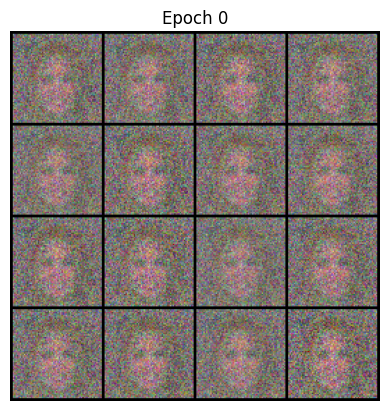

[Epoch 1/10] [Batch 0/17] [D loss: 0.3517390191555023] [G loss: 0.8244729042053223]


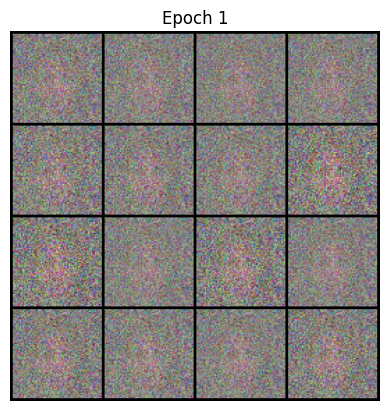

[Epoch 2/10] [Batch 0/17] [D loss: 0.32950133085250854] [G loss: 0.9166548848152161]


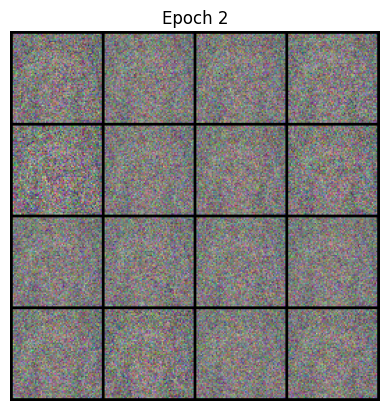

[Epoch 3/10] [Batch 0/17] [D loss: 0.29232144355773926] [G loss: 0.8699927926063538]


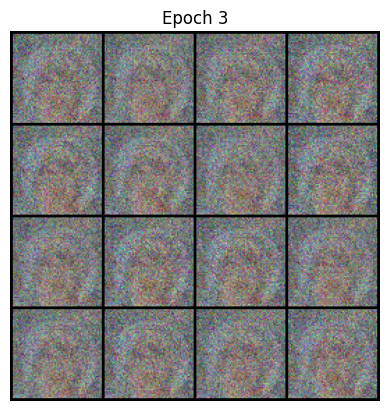

[Epoch 4/10] [Batch 0/17] [D loss: 0.2351565659046173] [G loss: 1.052579402923584]


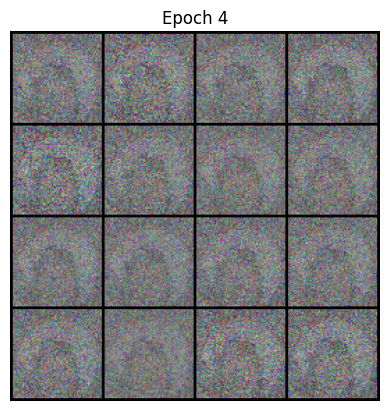

[Epoch 5/10] [Batch 0/17] [D loss: 0.20982441306114197] [G loss: 1.1971831321716309]


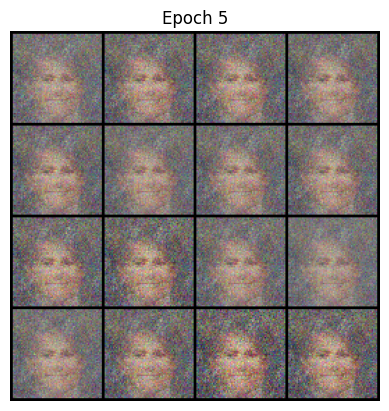

[Epoch 6/10] [Batch 0/17] [D loss: 0.3554154336452484] [G loss: 1.3049854040145874]


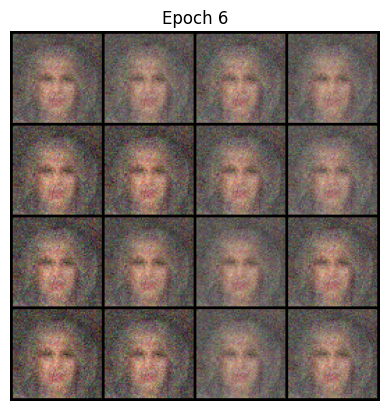

[Epoch 7/10] [Batch 0/17] [D loss: 0.3831193745136261] [G loss: 0.7255365252494812]


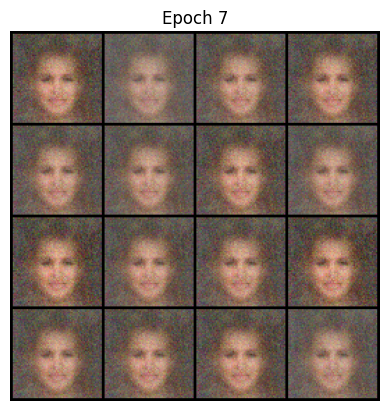

[Epoch 8/10] [Batch 0/17] [D loss: 0.34079402685165405] [G loss: 0.9305205941200256]


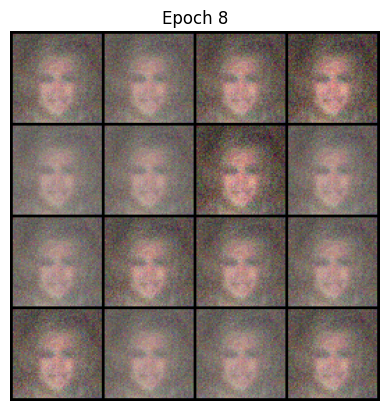

[Epoch 9/10] [Batch 0/17] [D loss: 0.20467135310173035] [G loss: 1.6114368438720703]


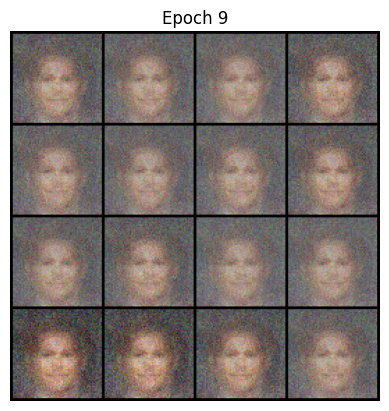

In [25]:
# Training loop
def train(generator, discriminator, dataloader, epochs=5):
    for epoch in range(epochs):
        for i, imgs in enumerate(dataloader):
            real_imgs = imgs.to(device)
            batch_size = real_imgs.size(0)
            valid = torch.ones(batch_size, 1).to(device)
            fake = torch.zeros(batch_size, 1).to(device)

            # Train Discriminator
            optimizer_D.zero_grad()
            real_loss = adversarial_loss(discriminator(real_imgs), valid)
            fake_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device)).detach()), fake)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            g_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device))), valid)
            g_loss.backward()
            optimizer_G.step()

            if i % 50 == 0:
                print(f"[Epoch {epoch}/{epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

        # Optionally, save generated images at each epoch
        save_generated_images(generator, epoch, device)

def save_generated_images(generator, epoch, device, num_images=16):
    z = torch.randn(num_images, 100).to(device)
    generated_imgs = generator(z).detach().cpu()
    grid = torchvision.utils.make_grid(generated_imgs, nrow=4, normalize=True)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.title(f"Epoch {epoch}")
    plt.axis('off')
    plt.show()

# Start training
train(generator, discriminator, dataloader, epochs=10)